In [10]:
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline
from matplotlib.cbook import CallbackRegistry

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import plotly.graph_objects as go
import numpy as np
import seaborn as sns



In [11]:
import plotly.graph_objects as go

import pandas as pd

In [21]:
data=pd.read_csv('/home/kirti/Data_sets/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
plt.figure()
rng = np.random.RandomState(0)
colors = rng.rand(150)
plt.scatter(data)

In [15]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

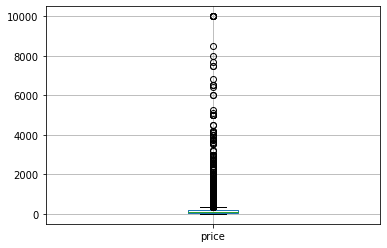

In [17]:
plt.figure()
data.boxplot(column='price',return_type='axes')

In [19]:
data.groupby(['neighbourhood','neighbourhood_group'])['price'].mean()

neighbourhood    neighbourhood_group
Allerton         Bronx                   87.595238
Arden Heights    Staten Island           67.250000
Arrochar         Staten Island          115.000000
Arverne          Queens                 171.779221
Astoria          Queens                 117.187778
                                           ...    
Windsor Terrace  Brooklyn               138.993631
Woodhaven        Queens                  67.170455
Woodlawn         Bronx                   60.090909
Woodrow          Staten Island          700.000000
Woodside         Queens                  85.097872
Name: price, Length: 221, dtype: float64

Text(0.5, 0, 'Region')

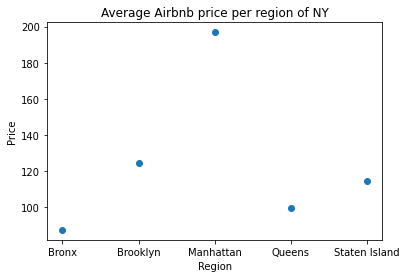

In [31]:
value=data.groupby(['neighbourhood_group'])['price'].mean()

plt.plot(value.keys(),value.values,'o')
plt.title('Average Airbnb price per region of NY')
plt.ylabel('Price')
plt.xlabel('Region')

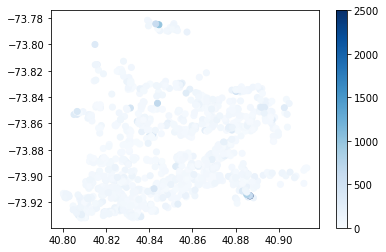

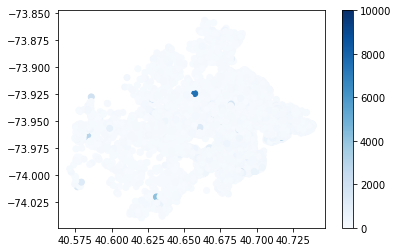

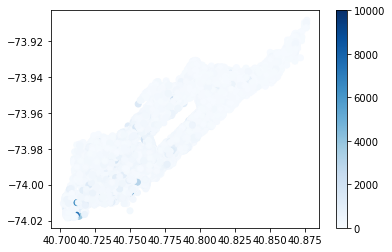

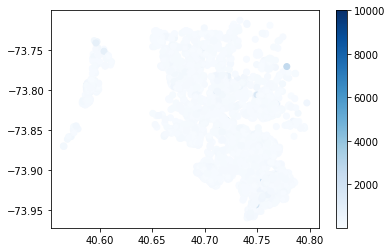

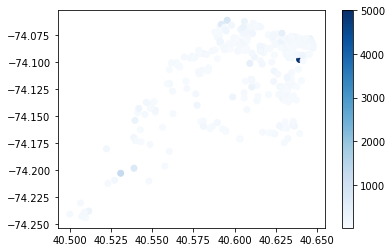

In [40]:
for region in value.keys():
    regiondf=data[data.neighbourhood_group==region]
    plt.scatter(regiondf.latitude,regiondf.longitude,c=regiondf.price,cmap='Blues')
    #plt.title('{} Prices'.format(regiondf['neighbourhood_group']))
    plt.colorbar()
    plt.show()

In [42]:
data.groupby(['neighbourhood_group'])['host_id'].nunique()

neighbourhood_group
Bronx              789
Brooklyn         15966
Manhattan        16578
Queens            3983
Staten Island      256
Name: host_id, dtype: int64


When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions is harder to find owners of two or more houses there.




<Figure size 432x288 with 0 Axes>

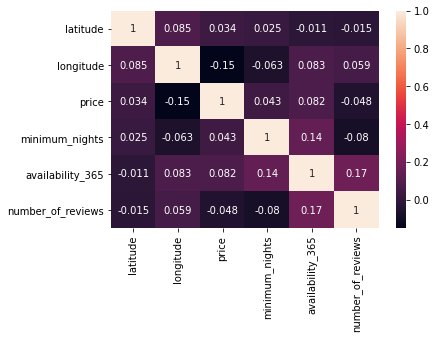

<Figure size 432x288 with 0 Axes>

In [43]:
sns.heatmap(data[['latitude','longitude','price','minimum_nights','availability_365','number_of_reviews']].corr(),annot=True)
plt.figure()

In [45]:
regions_dict = {value: i for i,value in enumerate(data.neighbourhood_group.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
reverse_regions_dict

{0: 'Brooklyn', 1: 'Manhattan', 2: 'Queens', 3: 'Staten Island', 4: 'Bronx'}

In [46]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Drawing the simple plot of prices below 500

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

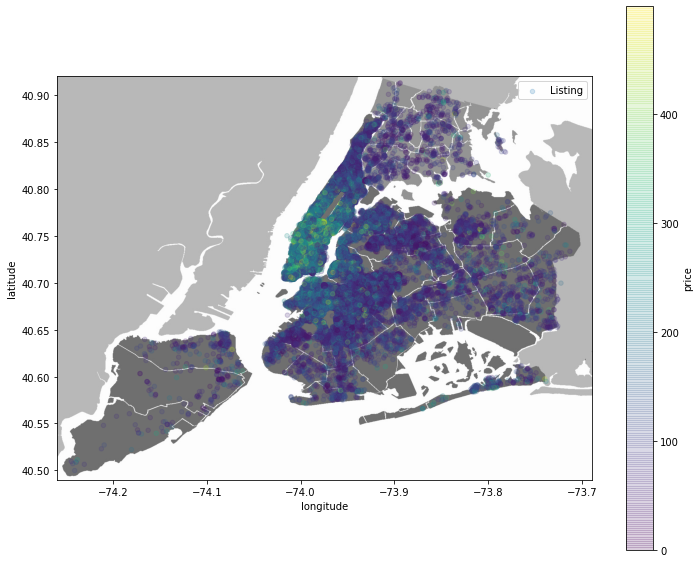

In [51]:
prices_less_500=data[data['price']<500]

plt.figure(figsize=(12,10))

nyc_img=plt.imread('/home/kirti/Data_sets/New_York_City_.png',0)
plt.imshow(nyc_img,zorder=0,extent=[-74.26,-73.689,40.49,40.92])
ax=plt.gca()

prices_less_500.plot(kind='scatter',x='longitude',y='latitude',c='price',label='Listing',ax=ax,
                     cmap=plt.get_cmap('viridis'),colorbar=True,alpha=0.2)

# Drawing the plot of neighbourhood groups

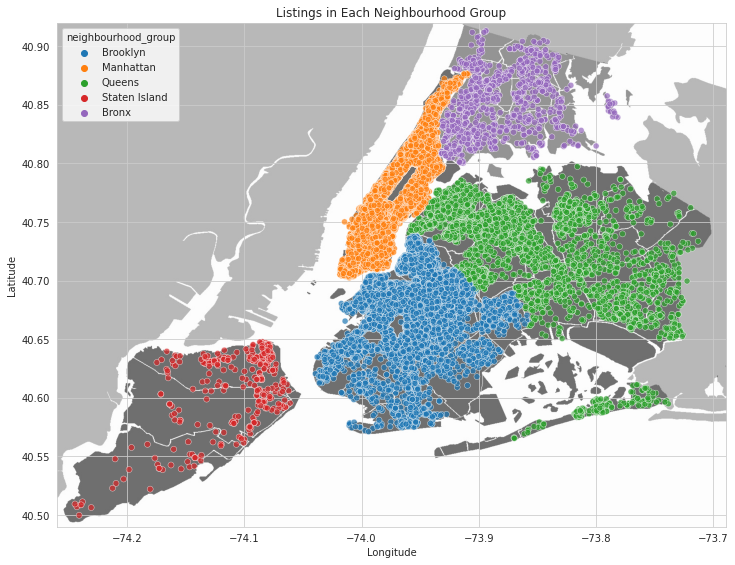

In [53]:
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
plt.imshow(nyc_img,zorder=0,extent=[-74.26,-73.689,40.49,40.92])
ax=plt.gca()
ax1=sns.scatterplot(x='longitude',y='latitude',data=data,hue='neighbourhood_group',alpha=0.7)
ax1.set(xlabel='Longitude', ylabel='Latitude', title='Listings in Each Neighbourhood Group')
plt.show()